In [338]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.nn import functional as F
import torch.utils.data as Data

In [340]:
#Gaussian random generator function, analagous to Ihor's but instead 
#done entirely through Pytorch.

#Generate randpom x_values
torch.manual_seed(1)
x = torch.unsqueeze(torch.linspace(-1, 1, 500), dim=1)  # shape=(500, 1)

In [341]:
x =Variable(x)

In [342]:
#Using ReLU activation
class Model(nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Model, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer
        
    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

In [343]:
mod = Model(n_feature=1, n_hidden=10, n_output=1)
optimizer = torch.optim.SGD(mod.parameters(), lr=0.1)
loss_func = torch.nn.MSELoss()   

In [350]:
prediction.data.shape

torch.Size([500, 1])

In [351]:
import random
random.seed(123)
def ran_gen():
    eigenarr =[]
    for i in range(100):
        #Randomly generate orbital eigenvalue for each atom specie
        eigenval = random.uniform(-6.0, 6.0)
        eigenarr.append(eigenval)
        #print(eigenval)
    return eigenarr

In [352]:
eigen_arr = ran_gen()

for i in range(0,5):
    mean_arr = torch.FloatTensor(list(np.zeros(100) + eigen_arr[i]))

In [353]:
len(eigen_arr)

100

In [294]:
def output_y(eigen_arr, x):
    
    
    for j in range(len(eigen_arr)):
        
        z =  x - torch.FloatTensor(list(np.zeros(500) + eigen_arr[j]))
        y = torch.exp(-z.pow(2)/Standard_Dev**2*2, out=None)/np.sqrt(2*np.pi*Standard_Dev)
        
        y = Variable(y)
        print(y)

In [373]:
output_y(eigen_arr, x) 
#Here is a tensor of size 100 x 500, which is used to illustrate the 500 points per species of which
#there are 100 

In [358]:
#This is the training function for the neural network;
#The model is trained over 1000 epochs for each and every eigenvalue,
#and the result is y_pred, the Gaussian value predicted by the original model.
#Hardcoded in is also Standard_Dev, which is assumed constant for all Gaussians.
#I used only 100 epochs this time around for convenience, as instantiating this function by itself
#is highly computationally intensive on my laptop without using GPU/Amazon EC2 instance/Scinet/etc.
def output_generator(eigen_arr, x):
    
    EPOCHS = 100
    Standard_Dev = 0.5
    y_pred = []
    
    for j in range(len(eigen_arr)):
        
        z =  x - torch.FloatTensor(list(np.zeros(500) + eigen_arr[j]))
        
        y = torch.exp(-z.pow(2)/Standard_Dev**2*2, out=None)/np.sqrt(2*np.pi*Standard_Dev)
        
        x = Variable(x)
        
        y = Variable(y)
    
        for i in range(1,EPOCHS+1):
  
            prediction = mod(x)      

            loss = loss_func(prediction, y)      

            optimizer.zero_grad()    
            
            loss.backward()          
            
            optimizer.step()        
            
        y_pred.append(prediction.data)
    return(y_pred)

In [ ]:
#Below is the desired array of outputs for all 100 species!

In [374]:
output_generator(eigen_arr,x) #500 datapoints * 100 species

### Here are some scatterplots of the "Gaussians" (after only 100 epochs none of them will come close to approximating a normal distribution function) ; however, after say 1000 epochs we'd have three curves very identical to Gaussians of equal width (STD = 0.5) and different means(eigenvalues), i.e the same curve shifted horizontally. Until say 1000 epochs of training these are just scribbles that we are looking to improve.

In [368]:
Z = np.linspace(0,499,500)

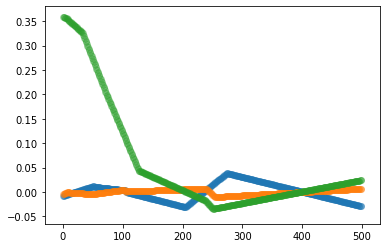

In [372]:
for i in range(0,3):
    plt.scatter(Z,output_generator(eigen_arr,x)[i], alpha = 0.3)